<a href="https://colab.research.google.com/github/BerkAIcelik/hate-speech-detection-system-using-TR-tweets/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install zemberek-python

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 112.4/112.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95.1/95.1 MB 11.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141214 sha256=a3200516a36427b633bcb5deb171788bdee86c1169269bd40e0cddb5b01015a3
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python3-runtime


In [ ]:
from google.colab import drive
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from zemberek import TurkishMorphology
from zemberek.normalization import TurkishSpellChecker
from zemberek.tokenization import TurkishTokenizer

In [ ]:
# Google Drive'ƒ± baƒülama
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# NLTK stopwords veri setini indirme
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Zemberek bile≈üenlerini y√ºkleme
morphology = TurkishMorphology.create_with_defaults()
spell_checker = TurkishSpellChecker(morphology)
tokenizer = TurkishTokenizer.DEFAULT
stop_words = set(stopwords.words('turkish'))


INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 6.012364864349365


2025-01-02 00:14:53,095 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 6.012364864349365



In [ ]:
!pip install openpyxl

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.9/250.9 kB 6.9 MB/s eta 0:00:00


In [ ]:
# ƒ∞lk veri seti: T√ºrk√ße Nefret S√∂ylemi Veriseti.xlsx
datafile1 = '/content/drive/MyDrive/TuÃàrkcÃße Nefret SoÃàylemi Veriseti.xlsx'
sheets1 = pd.ExcelFile(datafile1)
# T√ºm sayfa adlarƒ±nƒ± incele
sheet_names1 = sheets1.sheet_names
# TOPLAM sheet'ini hari√ß tutup diƒüerlerini birle≈ütirme
combined_data1 = pd.DataFrame()
for sheet_name in sheet_names1:
    if sheet_name != 'TOPLAM':
        temp_df = sheets1.parse(sheet_name, header=1)  # 2. satƒ±rdan itibaren s√ºtun isimleri alƒ±nƒ±yor
        combined_data1 = pd.concat([combined_data1, temp_df], ignore_index=True)

In [ ]:
# ƒ∞lk 3
print("Birle≈ütirilmi≈ü veri setinin ilk 3 satƒ±rƒ±:")
print(combined_data1.head(3))

Birle≈ütirilmi≈ü veri setinin ilk 3 satƒ±rƒ±:
   row ID                                              Tweet     Etiket  \
0  Row589  ya orospu cocuklari hepiniz niye ayni anda yaz...     nefret   
1  Row593  Ciddiye alan t√ºm d√ºnyanƒ±n beynini sileyim.. \n...  saldƒ±rgan   
2  Row600  Kayƒ±tlƒ± ƒ∞stihdama ge√ßi≈ü programƒ±na g√∂re (?)\n≈û...    hi√ßbiri   

  Alt Etiket   Etiket.1 Alt Etiket.1   Etiket.2 Alt Etiket.2 Etiket.3  \
0      etnik     nefret        etnik     nefret        etnik      NaN   
1        NaN  saldƒ±rgan          NaN  saldƒ±rgan          NaN      NaN   
2        NaN    hi√ßbiri          NaN    hi√ßbiri          NaN      NaN   

  Alt Etiket.3  ...  User - Location User - Time Zone User - Statuses  \
0          NaN  ...          g√∂ky√ºz√º              NaN            9417   
1          NaN  ...             ƒ∞MKB              NaN            8747   
2          NaN  ...            T. C.              NaN           27697   

   User - Followers  User - Friends  User - Fa

In [ ]:
# ƒ∞kinci veri seti: T√ºrk√ße Nefret S√∂ylemi Veri Seti v1.xlsx
datafile2 = '/content/drive/MyDrive/T√ºrk√ße Nefret S√∂ylemi Veri Seti v1.xlsx'
sheets2 = pd.ExcelFile(datafile2)
# 1000 Tweet sheet'ini y√ºkle
combined_data2 = sheets2.parse('1000 Tweet')  # 2. satƒ±rdan itibaren s√ºtun isimleri alƒ±nƒ±yor

In [ ]:
# S√ºtunlarƒ±n uyumluluƒüunu kontrol etme
columns1 = combined_data1.columns
columns2 = combined_data2.columns
# E≈üle≈üen ve e≈üle≈ümeyen s√ºtunlarƒ± belirleme
matching_columns = [col for col in columns1 if col in columns2]
non_matching_columns1 = [col for col in columns1 if col not in columns2]
non_matching_columns2 = [col for col in columns2 if col not in columns1]

In [ ]:
print("E≈üle≈üen s√ºtunlar:", matching_columns)
print("Birinci veri setinde olup ikinci veri setinde olmayan s√ºtunlar:", non_matching_columns1)
print("ƒ∞kinci veri setinde olup birinci veri setinde olmayan s√ºtunlar:", non_matching_columns2)

E≈üle≈üen s√ºtunlar: ['row ID', 'Tweet', 'Etiket', 'Alt Etiket', 'Tweet ID', 'Time', 'Favorited', 'Retweeted', 'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from', 'Latitude', 'Longitude', 'Country', 'User', 'User - Profile image', 'User - Name', 'User - ID', 'User - Description', 'User - URL', 'User - Creation time', 'User - Language', 'User - Location', 'User - Time Zone', 'User - Statuses', 'User - Followers', 'User - Friends', 'User - Favourites']
Birinci veri setinde olup ikinci veri setinde olmayan s√ºtunlar: ['Etiket.1', 'Alt Etiket.1', 'Etiket.2', 'Alt Etiket.2', 'Etiket.3', 'Alt Etiket.3', 'Unnamed: 35', 'RowID', 'Unnamed: 22', 'Row ID']
ƒ∞kinci veri setinde olup birinci veri setinde olmayan s√ºtunlar: []


In [ ]:
# Sadece e≈üle≈üen s√ºtunlarƒ± birle≈ütirme
combined_data1 = combined_data1[matching_columns]
combined_data2 = combined_data2[matching_columns]
final_combined_data = pd.concat([combined_data1, combined_data2], ignore_index=True)


In [ ]:
# ƒ∞lk 3
print("Birle≈ütirilmi≈ü nihai veri setinin ilk 3 satƒ±rƒ±:")
print(final_combined_data.head(3))

Birle≈ütirilmi≈ü nihai veri setinin ilk 3 satƒ±rƒ±:
   row ID                                              Tweet     Etiket  \
0  Row589  ya orospu cocuklari hepiniz niye ayni anda yaz...     nefret   
1  Row593  Ciddiye alan t√ºm d√ºnyanƒ±n beynini sileyim.. \n...  saldƒ±rgan   
2  Row600  Kayƒ±tlƒ± ƒ∞stihdama ge√ßi≈ü programƒ±na g√∂re (?)\n≈û...    hi√ßbiri   

  Alt Etiket      Tweet ID                 Time Favorited  Retweeted  \
0      etnik  1.169530e+23  2019-09-05 11:33:56        12          1   
1        NaN  1.169530e+23  2019-09-05 11:32:09         3          0   
2        NaN  1.169530e+23  2019-09-05 11:29:34        26          1   

   Is Favourited  Is Retweeted  ...  \
0              0             0  ...   
1              0             0  ...   
2              0             0  ...   

                                  User - Description  User - URL  \
0                                 duygusal bir topum         NaN   
1  m√ºhendis.. finansla da ilgilenir.. asla yatƒ±rƒ±

In [ ]:
# Birle≈ütirilmi≈ü nihai veri setini kaydetme
final_combined_data.to_csv('birlesik_veri_seti.csv', index=False)
print("Birle≈ütirilmi≈ü veri seti 'birlesik_veri_seti.csv' olarak kaydedildi.")

# Veri setinin genel yapƒ±sƒ±nƒ± inceleme
print("Veri setinin genel bilgisi:")
print(final_combined_data.info())


Birle≈ütirilmi≈ü veri seti 'birlesik_veri_seti.csv' olarak kaydedildi.
Veri setinin genel bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11224 entries, 0 to 11223
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row ID                10959 non-null  object 
 1   Tweet                 11224 non-null  object 
 2   Etiket                11224 non-null  object 
 3   Alt Etiket            2612 non-null   object 
 4   Tweet ID              11223 non-null  float64
 5   Time                  11224 non-null  object 
 6   Favorited             11224 non-null  object 
 7   Retweeted             11224 non-null  int64  
 8   Is Favourited         11224 non-null  int64  
 9   Is Retweeted          11224 non-null  int64  
 10  Is Retweet            11224 non-null  int64  
 11  Retweet from          1 non-null      float64
 12  Latitude              13 non-null     float64
 13  Longitude             

In [ ]:
# Birle≈ütirilmi≈ü nihai veri setini sadece Row ID, Tweet ve Etiket s√ºtunlarƒ± ile hazƒ±rlama
filtered_data = final_combined_data[['row ID', 'Tweet', 'Etiket']].copy()

# Row ID deƒüerlerini yeniden isimlendirme
filtered_data['row ID'] = ['row ' + str(i) for i in range(len(filtered_data))]

# ƒ∞lk ve son satƒ±rƒ± g√∂sterme
print("Filtrelenmi≈ü veri setinin ilk satƒ±rƒ±:")
print(filtered_data.head(1))

print("Filtrelenmi≈ü veri setinin son satƒ±rƒ±:")
print(filtered_data.tail(1))

Filtrelenmi≈ü veri setinin ilk satƒ±rƒ±:
  row ID                                              Tweet  Etiket
0  row 0  ya orospu cocuklari hepiniz niye ayni anda yaz...  nefret
Filtrelenmi≈ü veri setinin son satƒ±rƒ±:
          row ID                                              Tweet   Etiket
11223  row 11223  ulan ma√ßƒ± unutayƒ±m kafam daƒüƒ±lsƒ±n diye netflix...  hi√ßbiri


Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:
Etiket
hi√ßbiri      8386
nefret       2612
saldƒ±rgan     226
Name: count, dtype: int64


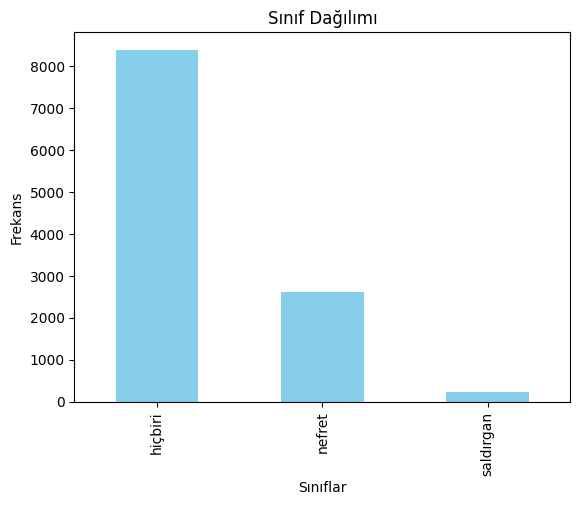

In [ ]:
# Sƒ±nƒ±f daƒüƒ±lƒ±mƒ± analizi
print("Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:")
class_distribution = filtered_data['Etiket'].value_counts()
print(class_distribution)

# Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütirme
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color='skyblue')
plt.title('Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Sƒ±nƒ±flar')
plt.ylabel('Frekans')
plt.show()

In [ ]:
from zemberek import TurkishMorphology
from functools import lru_cache
import time
import re
from zemberek import TurkishMorphology, TurkishSentenceNormalizer


normalizer = TurkishSentenceNormalizer(morphology)
# Zemberek Morphology ba≈ülatƒ±lƒ±yor
morphology = TurkishMorphology.create_with_defaults()

# Kontrol sayacƒ±
check_counter = 0

@lru_cache(maxsize=50000)
def cached_spell_check(word):
    global check_counter
    check_counter += 1
    if check_counter % 1000 == 0:
        print(f"{check_counter} kelime kontrol edildi...")

    # Yazƒ±m kontrol√º ve √∂neri alma
    suggestions = spell_checker.suggest_for_word(word)
    corrected_word = suggestions[0] if suggestions else word

    # Lemmatization i≈ülemi
    analysis = morphology.analyze(corrected_word)
    lemmas = [result.get_stem() for result in analysis]

    # Eƒüer lemma bulunmu≈üsa ilkini d√∂nd√ºr, yoksa d√ºzeltilmi≈ü kelimeyi d√∂nd√ºr
    return lemmas[0] if lemmas else corrected_word

# Tokenizasyon ve stopword temizleme
def tokenize_and_clean(text):
    # K√º√ß√ºk harfe √ßevirme
    text = text.lower()

    # URL'leri kaldƒ±rma
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # Kullanƒ±cƒ± etiketlerini kaldƒ±rma (@mention)
    text = re.sub(r'@\w+', '', text)

    # Sayƒ±larƒ± kaldƒ±rma
    text = re.sub(r'[0-9]', '', text)

    # Noktalama i≈üaretlerini kaldƒ±rma
    text = re.sub(r'[^\w\s]', '', text)

    # Fazla bo≈üluklarƒ± temizleme
    text = re.sub(r'\s+', ' ', text).strip()

    # Normalizasyon (Loodos mantƒ±ƒüƒ±na g√∂re Zemberek ile)
    text = normalizer.normalize(text)  # Metni normalize et (√∂rneƒüin, yanlƒ±≈ü yazƒ±mlarƒ± d√ºzelt)

    # Tokenize i≈ülemi (kelimelere ayƒ±rma)
    tokens = [token.content for token in tokenizer.tokenize(text)]

    # Stopwords (gereksiz kelimeleri) kaldƒ±rma
    tokens = [word for word in tokens if word not in stop_words]

    return tokens


# Yazƒ±m d√ºzeltmesi yapƒ±lmƒ±≈ü token'larƒ± saklamak i√ßin fonksiyon
def correct_tokens_separately(tokens):
    corrected_tokens = [cached_spell_check(token) for token in tokens]
    return corrected_tokens  # Burada, her kelimeyi d√ºzeltip geri d√∂nd√ºr√ºyoruz.



# Metin √∂n i≈üleme adƒ±mlarƒ±nƒ± ayrƒ± ayrƒ± √ßalƒ±≈ütƒ±rma ve s√ºre √∂l√ßme
processed_data = filtered_data.copy()

# Tokenizasyon ve stopword temizleme s√ºresi
start_time = time.time()
processed_data['Tokens'] = processed_data['Tweet'].apply(tokenize_and_clean)
end_time = time.time()
print(f"Tokenizasyon ve stopword temizleme s√ºresi: {end_time - start_time:.2f} saniye")

#yazƒ±m d√ºzeltme s√ºresi
start_time = time.time()
processed_data['Processed Tokens'] = processed_data['Tokens'].apply(correct_tokens_separately)
end_time = time.time()
print(f"yazƒ±m d√ºzeltme s√ºresi: {end_time - start_time:.2f} saniye")

# ƒ∞≈ülenmi≈ü veri setini kontrol etme
print("ƒ∞≈ülenmi≈ü veri setinin ilk 5 satƒ±rƒ±:")
print(processed_data.head())
print("\nƒ∞≈ülenmi≈ü veri setinin son 5 satƒ±rƒ±:")
print(processed_data.tail())



INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 5.976700782775879


2025-01-02 00:15:20,787 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 5.976700782775879

Tokenizasyon ve stopword temizleme s√ºresi: 899.59 saniye
1000 kelime kontrol edildi...
2000 kelime kontrol edildi...
3000 kelime kontrol edildi...
4000 kelime kontrol edildi...
5000 kelime kontrol edildi...
6000 kelime kontrol edildi...
7000 kelime kontrol edildi...
8000 kelime kontrol edildi...
9000 kelime kontrol edildi...
10000 kelime kontrol edildi...
11000 kelime kontrol edildi...
12000 kelime kontrol edildi...
13000 kelime kontrol edildi...
14000 kelime kontrol edildi...
15000 kelime kontrol edildi...
16000 kelime kontrol edildi...
17000 kelime kontrol edildi...
18000 kelime kontrol edildi...
19000 kelime kontrol edildi...
20000 kelime kontrol edildi...
21000 kelime kontrol edildi...
22000 kelime kontrol edildi...
23000 kelime kontrol edildi...
24000 kelime kontrol edildi...
25000 kelime kontrol edildi...
26000 kelime kontrol edildi...
27000 k

In [ ]:
# ƒ∞≈ülenmi≈ü veriyi CSV olarak kaydetme
output_file = 'processed_data1.csv'
processed_data.to_csv(output_file, index=False)
print(f"ƒ∞≈ülenmi≈ü veri seti '{output_file}' olarak kaydedildi.")


ƒ∞≈ülenmi≈ü veri seti 'processed_data1.csv' olarak kaydedildi.


In [ ]:
# Google Drive'ƒ± baƒülama
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive

import pandas as pd
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# CSV dosyasƒ±nƒ± okuma
input_file = '/content/drive/MyDrive/processed_data1.csv'
processed_data = pd.read_csv(input_file)

print("CSV dosyasƒ± ba≈üarƒ±yla y√ºklendi!")
print("ƒ∞lk 5 satƒ±r:")
print(processed_data.head())


In [ ]:

import logging
import sys
import multiprocessing

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
import itertools

In [ ]:
# processed_data['Tokens'] √ºzerinde split i≈ülemi yapƒ±lmaz, √ß√ºnk√º veri zaten tokenize edilmi≈ü.
print(processed_data.head())

processed_data['Processed Tokens'] = processed_data['Processed Tokens'].apply(lambda x: eval(x) if isinstance(x, str) else x)
print(processed_data['Processed Tokens'].apply(lambda x: 'e≈ücinsel' in x))
a

# Model eƒüitimi
word2_model1 = Word2Vec(sentences=processed_data['Processed Tokens'], vector_size=100, window=5, min_count=1, sg=1, negative=4, epochs=10, workers=multiprocessing.cpu_count())

# 'e≈ücinsel' kelimesiyle en benzer kelimeleri bulalƒ±m
print(word2_model1.wv.most_similar(positive=['e≈ücinsel']))


  row ID                                              Tweet     Etiket  \
0  row 0  ya orospu cocuklari hepiniz niye ayni anda yaz...     nefret   
1  row 1  Ciddiye alan t√ºm d√ºnyanƒ±n beynini sileyim.. \n...  saldƒ±rgan   
2  row 2  Kayƒ±tlƒ± ƒ∞stihdama ge√ßi≈ü programƒ±na g√∂re (?)\n≈û...    hi√ßbiri   
3  row 3  Hastaneye git Suriyeli. PTT ye git Suriyeli. P...     nefret   
4  row 4               C√∂lesi bitmi≈ü suriyeli gibiyim bug√ºn    hi√ßbiri   

                                              Tokens  \
0  ['orospu', '√ßocuklarƒ±', 'hepiniz', 'aynƒ±', 'an...   
1  ['ciddiye', 'alan', 'd√ºnyanƒ±n', 'beynini', 'si...   
2  ['kayƒ±tlƒ±', 'istihdama', 'ge√ßi≈ü', 'programƒ±na'...   
3  ['hastaneye', 'git', 'suriyeli', 'ptt', 'ye', ...   
4  ['colesi', 'bitmi≈ü', 'suriyeli', 'gibiyim', 'b...   

                                    Processed Tokens  
0  ['orospu', '√ßocuk', 'hep', 'aynƒ±', 'an', 'yap'...  
1  ['ciddi', 'ol', 'd√ºnya', 'beyn', 'bil', 'iki',...  
2  ['kayƒ±t', 'istihda

In [ ]:
import numpy as np

def get_sentence_vector(model, tokens):
    # Tokenler modelde varsa, kelime vekt√∂rlerini alƒ±p ortalamasƒ±nƒ± d√∂nd√ºr√ºyoruz
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


In [ ]:
# C√ºmle vekt√∂rlerini elde ediyoruz
processed_data['Sentence Vector'] = processed_data['Processed Tokens'].apply(lambda x: get_sentence_vector(word2_model1, x))
from sklearn.preprocessing import LabelEncoder

# Etiket s√ºtununu sayƒ±sal verilere d√∂n√º≈üt√ºrme
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(processed_data['Etiket'])

# Bu a≈üamada, eƒüer etiketli bir veri k√ºmeniz varsa, etiketleri de alƒ±yoruz
X = np.array(processed_data['Sentence Vector'].tolist())  # Giri≈ü vekt√∂rleri
y = numeric_labels  # Etiketler (sƒ±nƒ±flar)


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 243.2/243.2 kB 9.4 MB/s eta 0:00:00


In [ ]:
pip install tensorflow --upgrade


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 615.3/615.3 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.5/5.5 MB 122.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
# Processed Tokens s√ºtununu doƒüru formata d√∂n√º≈üt√ºrme
processed_data['Processed Tokens'] = processed_data['Processed Tokens'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Formatƒ± kontrol etme
print(processed_data['Processed Tokens'].head())


0    [orospu, √ßocuk, hep, aynƒ±, an, yap, t√ºm, ciddi...
1    [ciddi, ol, d√ºnya, beyn, bil, iki, g√ºn, ba≈ü, g...
2    [kayƒ±t, istihdam, geni≈ü, program, g√∂re, ≈üimdil...
3    [hastane, ait, suriye, ptt, de, ait, suriye, p...
4                     [coke, git, suriye, gibi, bug√ºn]
Name: Processed Tokens, dtype: object


In [ ]:
# Gerekli k√ºt√ºphaneleri y√ºkleme
import multiprocessing
import numpy as np
from gensim.models import Word2Vec, KeyedVectors


# Word2Vec modelini y√ºkleme
model_path = "/content/drive/MyDrive/trmodel"  # Model dosyasƒ±nƒ±n yolu
turkish_word2vec = KeyedVectors.load_word2vec_format(model_path, binary=True)
print("Model ba≈üarƒ±yla y√ºklendi.")

# 'Processed Tokens' s√ºtununu listeye √ßevirin
tokenized_texts = processed_data['Processed Tokens'].tolist()
print(f"Toplam {len(tokenized_texts)} metin y√ºklendi.")

# Yeni bir Word2Vec modeli olu≈ütur
model = Word2Vec(vector_size=turkish_word2vec.vector_size, window=5, min_count=1, workers=multiprocessing.cpu_count() - 1)
model.build_vocab(tokenized_texts)

# Pre-trained modelin aƒüƒ±rlƒ±klarƒ±nƒ± yeni modele aktar
word_dict = {word: turkish_word2vec.get_vector(word) for word in model.wv.index_to_key if word in turkish_word2vec.key_to_index}

# Pre-trained vekt√∂rleri yeni modele kopyala
for word, vector in word_dict.items():
    if word in model.wv.key_to_index:
        model.wv.vectors[model.wv.key_to_index[word]] = vector

print(f"Transfer edilen kelime sayƒ±sƒ±: {len(word_dict)}")

# Yeni verilerle modeli fine-tune etme
model.train(
    tokenized_texts,
    total_examples=len(tokenized_texts),
    epochs=10
)

# Fine-tuned modelinizi kaydedin
fine_tuned_model_path = "fine_tuned_word2vec.model"
model.save(fine_tuned_model_path)
print(f"Fine-tuned model '{fine_tuned_model_path}' dosyasƒ±na kaydedildi.")



Model ba≈üarƒ±yla y√ºklendi.
Toplam 11224 metin y√ºklendi.
Transfer edilen kelime sayƒ±sƒ±: 10513
Fine-tuned model 'fine_tuned_word2vec.model' dosyasƒ±na kaydedildi.


In [ ]:

# Fine-tuned modeli y√ºkleyin
model = Word2Vec.load(fine_tuned_model_path)
print("Fine-tuned model ba≈üarƒ±yla y√ºklendi.")

# Belge vekt√∂rlerini hesaplayan fonksiyon
def get_document_vector(tokens, word2vec_model, vector_size=100):
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

# C√ºmle vekt√∂rlerini hesaplama
processed_data['Sentence Vector'] = processed_data['Processed Tokens'].apply(lambda x: get_document_vector(x, model, vector_size=model.vector_size))
print("C√ºmle vekt√∂rleri ba≈üarƒ±yla hesaplandƒ±.")

Fine-tuned model ba≈üarƒ±yla y√ºklendi.
C√ºmle vekt√∂rleri ba≈üarƒ±yla hesaplandƒ±.


In [ ]:

# Etiket s√ºtununu sayƒ±sal verilere d√∂n√º≈üt√ºrme
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(processed_data['Etiket'])

# Bu a≈üamada, eƒüer etiketli bir veri k√ºmeniz varsa, etiketleri de alƒ±yoruz
X = np.array(processed_data['Sentence Vector'].tolist())  # Giri≈ü vekt√∂rleri
y = numeric_labels  # Etiketler (sƒ±nƒ±flar)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Daha √∂nce olu≈üturulan kombinasyonlar (count_combination_data, tfidf_combination_data) kullanƒ±lacak
# √áƒ±ktƒ±lar i√ßin dosya yolunu ayarlama
output_dir = "/content/drive/MyDrive/outputs1"
os.makedirs(output_dir, exist_ok=True)

# Etiketleri Y√ºkleme ve Sayƒ±sal D√∂n√º≈ü√ºm
labels = processed_data['Etiket']
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)
print(f"Etiketler d√∂n√º≈üt√ºr√ºld√º: {list(label_encoder.classes_)}")

# Veri Seti B√∂lme Fonksiyonu

def split_data(matrix, labels):
    # LightGBM ve diƒüer modeller i√ßin gerekli d√∂n√º≈ü√ºm
    matrix = matrix.astype(np.float32) if hasattr(matrix, 'astype') else matrix
    return train_test_split(matrix, labels, test_size=0.2, random_state=42)

# Performans √ñl√ß√ºm Fonksiyonu
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Precision, Recall, F1-Score ve Accuracy hesaplamalarƒ±
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, predictions)

    # Metriƒüi ekrana yazdƒ±rma
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")
    return precision, recall, f1, accuracy, predictions

# Confusion Matrix G√∂rselle≈ütirme Fonksiyonu
def save_confusion_matrix(y_true, y_pred, model_name, data_type):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(f"Confusion Matrix - {model_name} ({data_type})")
    file_path = os.path.join(output_dir, f"confusion_matrix_{model_name}_{data_type}.png")
    plt.savefig(file_path, bbox_inches='tight')
    plt.close()
    print(f"Confusion matrix kaydedildi: {file_path}")

# Eƒüitim ve Doƒürulama Metriklerini Kaydetme Fonksiyonu
def save_training_validation_metrics(history, model_name, data_type):
    epochs = range(1, len(history['loss']) + 1)

    # Loss Grafiƒüi
    plt.plot(epochs, history['loss'], label='Training Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f"Loss - {model_name} ({data_type})")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    file_path_loss = os.path.join(output_dir, f"loss_{model_name}_{data_type}.png")
    plt.savefig(file_path_loss, bbox_inches='tight')
    plt.close()
    print(f"Loss grafiƒüi kaydedildi: {file_path_loss}")

    # Accuracy Grafiƒüi
    plt.plot(epochs, history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy - {model_name} ({data_type})")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    file_path_acc = os.path.join(output_dir, f"accuracy_{model_name}_{data_type}.png")
    plt.savefig(file_path_acc, bbox_inches='tight')
    plt.close()
    print(f"Accuracy grafiƒüi kaydedildi: {file_path_acc}")

# Kombinasyonlar i√ßin Performans Deƒüerlendirme Tablosu
results = []






Etiketler d√∂n√º≈üt√ºr√ºld√º: ['hi√ßbiri', 'nefret', 'saldƒ±rgan']


In [ ]:
def evaluate_random_forest_with_word2vec():
    print(f"Word2Vec ile Random Forest modeli deƒüerlendiriliyor...")

    # C√ºmle vekt√∂rlerini alƒ±yoruz
    X = np.array(processed_data['Sentence Vector'].tolist())
    y = numeric_labels  # Etiketler

    X_train, X_test, y_train, y_test = split_data(X, y)

    model = RandomForestClassifier(
        n_estimators=400,
        max_depth=10,
        min_samples_split=8,
        random_state=42
    )
    precision, recall, f1, accuracy, predictions = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        'Model': 'Random Forest',
        'Data Type': 'Word2Vec',
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })

    # Confusion Matrix Kaydetme
    save_confusion_matrix(y_test, predictions, "RandomForest", 'Word2Vec')

In [ ]:
# Deƒüerlendirme ƒ∞≈ülemi
print("Random Forest Modeli Deƒüerlendiriliyor...")
evaluate_random_forest_with_word2vec()

Random Forest Modeli Deƒüerlendiriliyor...
Word2Vec ile Random Forest modeli deƒüerlendiriliyor...
Precision: 0.7783, Recall: 0.7653, F1-Score: 0.6855, Accuracy: 0.7653
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1/confusion_matrix_RandomForest_Word2Vec.png


In [ ]:
# XGBoost Modeli
def evaluate_xgboost():
  print(f"Word2Vec ile Xgboost modeli deƒüerlendiriliyor...")
 # C√ºmle vekt√∂rlerini alƒ±yoruz
  X = np.array(processed_data['Sentence Vector'].tolist())
  y = numeric_labels  # Etiketler

  X_train, X_test, y_train, y_test = split_data(X, y)
  model = XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_estimators=800,
        max_depth=15,
        learning_rate=0.25,
        subsample=0.7
            )
  precision, recall, f1, accuracy, predictions = evaluate_model(model, X_train, X_test, y_train, y_test)
  results.append({
        'Model': 'XGBoost',
        'Data Type': 'Word2Vec',
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
            })

            # Confusion Matrix Kaydetme
  save_confusion_matrix(y_test, predictions, "XGBoost", 'Word2Vec')


In [ ]:
# Deƒüerlendirme ƒ∞≈ülemi
print("xgboost Modeli Deƒüerlendiriliyor...")
evaluate_xgboost()


xgboost Modeli Deƒüerlendiriliyor...
Word2Vec ile Xgboost modeli deƒüerlendiriliyor...
Precision: 0.8025, Recall: 0.8040, F1-Score: 0.7702, Accuracy: 0.8040
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1/confusion_matrix_XGBoost_Word2Vec.png


In [ ]:
# LightGBM Modeli
def evaluate_lightgbm():
  print(f"Word2Vec ile lightgbm modeli deƒüerlendiriliyor...")
 # C√ºmle vekt√∂rlerini alƒ±yoruz
  X = np.array(processed_data['Sentence Vector'].tolist())
  y = numeric_labels  # Etiketler
  X_train, X_test, y_train, y_test = split_data(X, y)
  model = LGBMClassifier(random_state=42, num_leaves=20, max_depth=20, learning_rate=0.005, n_estimators=800)
  precision, recall, f1, accuracy, predictions = evaluate_model(model, X_train, X_test, y_train, y_test)
  results.append({
                'Model': 'LightGBM',
                'Data Type': 'Word2Vec',
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'Accuracy': accuracy
            })

            # Confusion Matrix Kaydetme


  save_confusion_matrix(y_test, predictions, "LightGBM", 'Word2Vec')



In [ ]:
print("lightgbm Modeli Deƒüerlendiriliyor...")
evaluate_lightgbm()

lightgbm Modeli Deƒüerlendiriliyor...
Word2Vec ile lightgbm modeli deƒüerlendiriliyor...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 8979, number of used features: 400
[LightGBM] [Info] Start training from score -0.289652
[LightGBM] [Info] Start training from score -1.465892
[LightGBM] [Info] Start training from score -3.882288


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Precision: 0.7746, Recall: 0.7924, F1-Score: 0.7494, Accuracy: 0.7924
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1/confusion_matrix_LightGBM_Word2Vec.png


In [ ]:

from keras.optimizers import Adam  # Adam optimizer import ediliyor
# ANN Modeli
def evaluate_ann():
  print(f"Word2Vec ile Xgboost modeli deƒüerlendiriliyor...")
 # C√ºmle vekt√∂rlerini alƒ±yoruz
  X = np.array(processed_data['Sentence Vector'].tolist())
  y = numeric_labels  # Etiketler
  X_train, X_test, y_train, y_test = split_data(X, y)

  # Kategorik etiketlere d√∂n√º≈üt√ºrme
  y_train_cat = to_categorical(y_train, num_classes=len(label_encoder.classes_))
  y_test_cat = to_categorical(y_test, num_classes=len(label_encoder.classes_))

  # Modeli tanƒ±mlama
  input_dim = X_train.shape[1]
  model = Sequential([
      Dense(128, activation='relu', input_dim=input_dim),
      Dropout(0.3),
      Dense(64, activation='relu'),
      Dropout(0.3),
      Dense(len(label_encoder.classes_), activation='softmax')
  ])
  optimizer = Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Modeli eƒüitme
  early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
  history = model.fit(
      X_train,
      y_train_cat,
      validation_data=(X_test, y_test_cat),
      epochs=50,
      batch_size=4,
      callbacks=[early_stopping],
      verbose=1
  )

  # Tahminler ve performans
  predictions = model.predict(X_test).argmax(axis=1)

  # Precision, Recall, F1-Score ve Accuracy hesaplamalarƒ±
  precision = precision_score(y_test, predictions, average='weighted')
  recall = recall_score(y_test, predictions, average='weighted')
  f1 = f1_score(y_test, predictions, average='weighted')
  accuracy = accuracy_score(y_test, predictions)  # Accuracy hesaplama

  results.append({
      'Model': 'ANN',
      'Data Type': 'Word2Vec',
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1,
      'Accuracy': accuracy  # Accuracy'yi ekle
  })

  # Confusion Matrix Kaydetme
  save_confusion_matrix(y_test, predictions, "ANN", 'Word2Vec')

  # Eƒüitim ve doƒürulama metriklerini kaydetme
  history_dict = {
      'loss': history.history['loss'],
      'val_loss': history.history['val_loss'],
      'accuracy': history.history['accuracy'],
      'val_accuracy': history.history['val_accuracy']
  }
  save_training_validation_metrics(history_dict, "ANN", 'Word2Vec')


In [ ]:
print("ANN Modeli Deƒüerlendiriliyor...")
evaluate_ann()

ANN Modeli Deƒüerlendiriliyor...
Word2Vec ile Xgboost modeli deƒüerlendiriliyor...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2245/2245 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.7417 - loss: 0.6582 - val_accuracy: 0.7795 - val_loss: 0.5350
Epoch 2/50
2245/2245 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.7738 - loss: 0.5406 - val_accuracy: 0.7893 - val_loss: 0.5127
Epoch 3/50
2245/2245 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.7893 - loss: 0.5087 - val_accuracy: 0.7906 - val_loss: 0.5045
Epoch 4/50
2245/2245 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8064 - loss: 0.4770 - val_accuracy: 0.7889 - val_loss: 0.4974
Epoch 5/50
2245/2245 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8089 - loss: 0.4678 - val_accuracy: 0.7982 - val_loss: 0.4972
Epoch 6/50
2245/2245 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8209 - loss: 0.4498 - val_accuracy: 0.7991 - val_loss

In [ ]:
# Sonu√ßlarƒ± DataFrame olarak kaydetme
results_df = pd.DataFrame(results)
print("Sonu√ßlar:")
print(results_df)

# Sonu√ßlarƒ± CSV olarak kaydetme
results_df.to_csv('model_performance_results.csv', index=False)
print("Sonu√ßlar 'model_performance_results.csv' dosyasƒ±na kaydedildi.")

Sonu√ßlar:
           Model Data Type  Precision    Recall  F1-Score  Accuracy
0  Random Forest  Word2Vec   0.778316  0.765256  0.685489  0.765256
1        XGBoost  Word2Vec   0.802501  0.804009  0.770188  0.804009
2       LightGBM  Word2Vec   0.774639  0.792428  0.749425  0.792428
3            ANN  Word2Vec   0.797101  0.804009  0.788682  0.804009
Sonu√ßlar 'model_performance_results.csv' dosyasƒ±na kaydedildi.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Se√ßilen kombinasyonlar i√ßin resampling i≈ülemleri tamamlandƒ± ve veri setleri modelde kullanƒ±labilir hale getirildi.
Rastgele se√ßilen √∂rnek: combined_Word2Vec


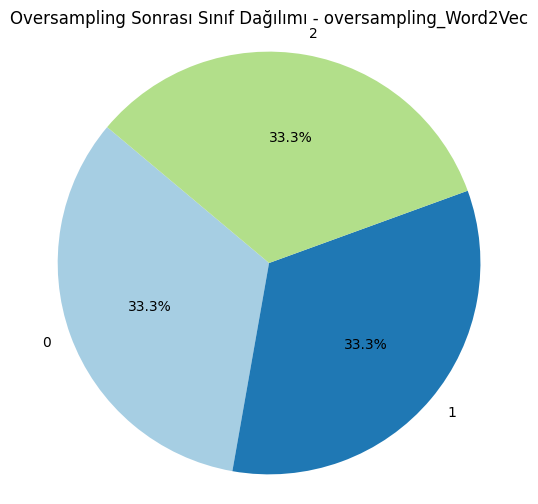

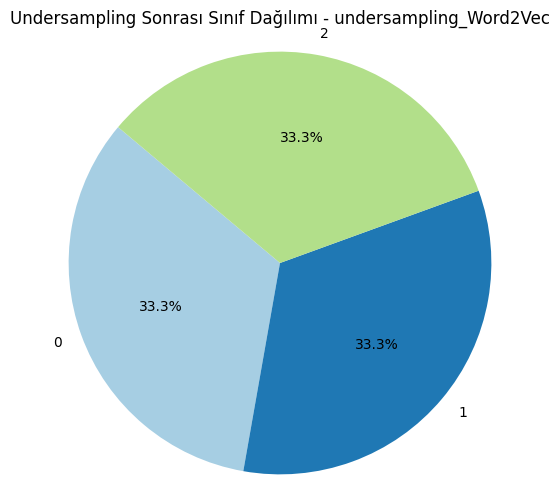

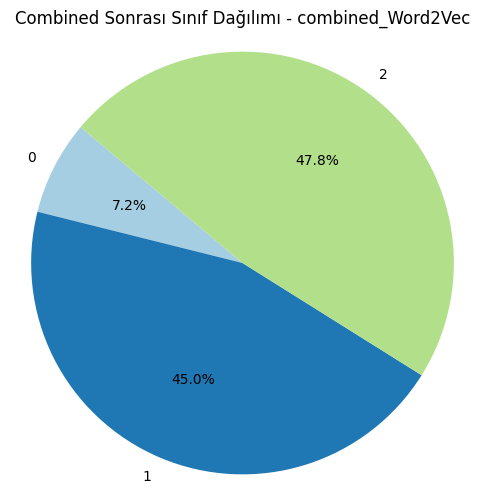

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Resampling i≈ülemleri i√ßin kullanƒ±lacak fonksiyonlar
def resample_data(X, y, method):
    """
    Resampling i≈ülemini ger√ßekle≈ütirir (oversampling, undersampling veya combined).
    """
    if method == 'oversampling':
        resampler = SMOTE(random_state=42)
    elif method == 'undersampling':
        resampler = RandomUnderSampler(random_state=42)
    elif method == 'combined':
        resampler = SMOTEENN(random_state=42)
    else:
        raise ValueError("Ge√ßersiz resampling y√∂ntemi: 'oversampling', 'undersampling', veya 'combined' olmalƒ±.")

    X_resampled, y_resampled = resampler.fit_resample(X, y)
    return X_resampled, y_resampled


# T√ºm veri setleri i√ßin resampling i≈ülemleri
resampled_data_sets = {}

# Orijinal veri
X_original = np.array(processed_data['Sentence Vector'].tolist())  # Giri≈ü vekt√∂rleri
y_original = numeric_labels  # Etiketler (sƒ±nƒ±flar)
# Oversampling sonrasƒ±
X_oversampled, y_oversampled = resample_data(X_original, y_original, method='oversampling')
resampled_data_sets[f"oversampling_{'Word2Vec'}"] = (X_oversampled, y_oversampled)

# Undersampling sonrasƒ±
X_undersampled, y_undersampled = resample_data(X_original, y_original, method='undersampling')
resampled_data_sets[f"undersampling_{'Word2Vec'}"] = (X_undersampled, y_undersampled)

# Combined y√∂ntem sonrasƒ±
X_combined, y_combined = resample_data(X_original, y_original, method='combined')
resampled_data_sets[f"combined_{'Word2Vec'}"] = (X_combined, y_combined)

print("Se√ßilen kombinasyonlar i√ßin resampling i≈ülemleri tamamlandƒ± ve veri setleri modelde kullanƒ±labilir hale getirildi.")

# Rastgele 1 √∂rnek se√ßme ve inceleme
random_sample_key = np.random.choice(list(resampled_data_sets.keys()))
print(f"Rastgele se√ßilen √∂rnek: {random_sample_key}")
X_sample, y_sample = resampled_data_sets[random_sample_key]

# Pasta grafikleri √ßizme fonksiyonu
def plot_pie_chart(y, title):
    labels, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Resampling y√∂ntemlerine g√∂re pasta grafikleri √ßizdirme
methods = ['oversampling', 'undersampling', 'combined']
for method in methods:
    sample_key = f"{method}_{random_sample_key.split('_', 1)[1]}"
    if sample_key in resampled_data_sets:
        _, y_resampled = resampled_data_sets[sample_key]
        plot_pie_chart(y_resampled, f"{method.capitalize()} Sonrasƒ± Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ± - {sample_key}")


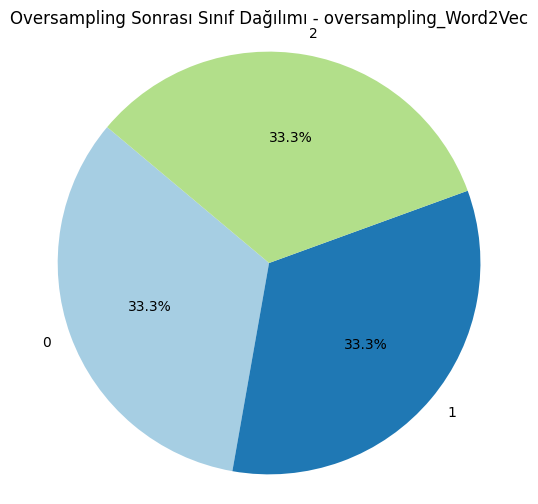

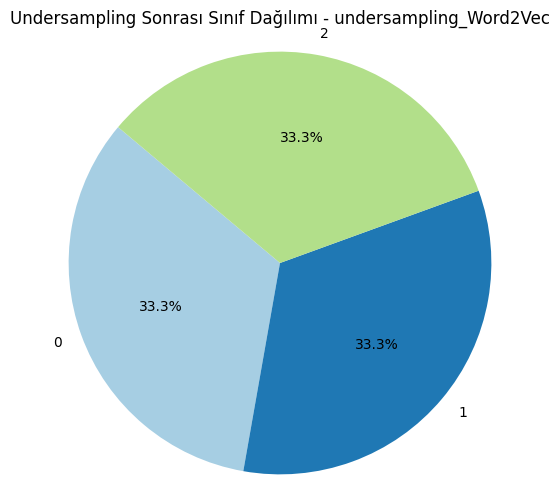

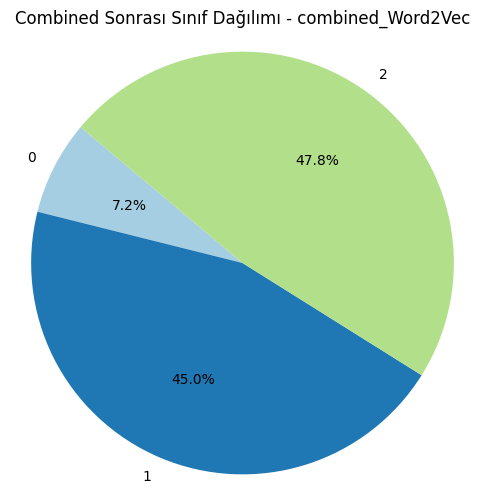

In [ ]:
# Pasta grafikleri √ßizme fonksiyonu
def plot_pie_chart(y, title):
    labels, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Resampling y√∂ntemlerine g√∂re pasta grafikleri √ßizdirme
methods = ['oversampling', 'undersampling', 'combined']
for method in methods:
    sample_key = f"{method}_{random_sample_key.split('_', 1)[1]}"
    if sample_key in resampled_data_sets:
        _, y_resampled = resampled_data_sets[sample_key]
        plot_pie_chart(y_resampled, f"{method.capitalize()} Sonrasƒ± Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ± - {sample_key}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Daha √∂nce olu≈üturulan kombinasyonlar (count_combination_data, tfidf_combination_data) kullanƒ±lacak
# √áƒ±ktƒ±lar i√ßin dosya yolunu ayarlama
output_dir = "/content/drive/MyDrive/outputs1_resample"
os.makedirs(output_dir, exist_ok=True)

# Etiketleri Y√ºkleme ve Sayƒ±sal D√∂n√º≈ü√ºm
labels = processed_data['Etiket']
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)
print(f"Etiketler d√∂n√º≈üt√ºr√ºld√º: {list(label_encoder.classes_)}")

# Veri Seti B√∂lme Fonksiyonu

def split_data(matrix, labels):
    # LightGBM ve diƒüer modeller i√ßin gerekli d√∂n√º≈ü√ºm
    matrix = matrix.astype(np.float32) if hasattr(matrix, 'astype') else matrix
    return train_test_split(matrix, labels, test_size=0.2, random_state=42)

# Performans √ñl√ß√ºm Fonksiyonu
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Precision, Recall, F1-Score ve Accuracy hesaplamalarƒ±
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, predictions)

    # Metriƒüi ekrana yazdƒ±rma
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")
    return precision, recall, f1, accuracy, predictions

# Confusion Matrix G√∂rselle≈ütirme Fonksiyonu
def save_confusion_matrix(y_true, y_pred, model_name, data_type, combination):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(f"Confusion Matrix - {model_name} ({data_type} - {combination})")
    file_path = os.path.join(output_dir, f"confusion_matrix_{model_name}_{data_type}_{combination}.png")
    plt.savefig(file_path, bbox_inches='tight')
    plt.close()
    print(f"Confusion matrix kaydedildi: {file_path}")

# Eƒüitim ve Doƒürulama Metriklerini Kaydetme Fonksiyonu
def save_training_validation_metrics(history, model_name, data_type, combination):
    epochs = range(1, len(history['loss']) + 1)

    # Loss Grafiƒüi
    plt.plot(epochs, history['loss'], label='Training Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f"Loss - {model_name} ({data_type} - {combination})")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    file_path_loss = os.path.join(output_dir, f"loss_{model_name}_{data_type}_{combination}.png")
    plt.savefig(file_path_loss, bbox_inches='tight')
    plt.close()
    print(f"Loss grafiƒüi kaydedildi: {file_path_loss}")

    # Accuracy Grafiƒüi
    plt.plot(epochs, history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy - {model_name} ({data_type} - {combination})")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    file_path_acc = os.path.join(output_dir, f"accuracy_{model_name}_{data_type}_{combination}.png")
    plt.savefig(file_path_acc, bbox_inches='tight')
    plt.close()
    print(f"Accuracy grafiƒüi kaydedildi: {file_path_acc}")

# Kombinasyonlar i√ßin Performans Deƒüerlendirme Tablosu
results = []

Etiketler d√∂n√º≈üt√ºr√ºld√º: ['hi√ßbiri', 'nefret', 'saldƒ±rgan']


In [ ]:

# Random Forest Modeli

def evaluate_random_forest_resampled():
    for key, (X_resampled, y_resampled) in resampled_data_sets.items():
        print(f"Random Forest ile {key} kombinasyonu deƒüerlendiriliyor...")
        X_train, X_test, y_train, y_test = split_data(X_resampled, y_resampled)
        model = RandomForestClassifier(
            random_state=42,
            n_estimators=400,
            max_depth=10,
            min_samples_split=8

        )
        precision, recall, f1, accuracy, predictions = evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append({
            'Model': 'Random Forest',
            'Data Type': 'Resampled',
            'Kombinasyon': key,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        })

        # Confusion Matrix Kaydetme
        save_confusion_matrix(y_test, predictions, "RandomForest", "Resampled", key)



In [ ]:
print("random forest Modeli Deƒüerlendiriliyor...")
evaluate_random_forest_resampled()

random forest Modeli Deƒüerlendiriliyor...
Random Forest ile oversampling_Word2Vec kombinasyonu deƒüerlendiriliyor...
Precision: 0.8812, Recall: 0.8822, F1-Score: 0.8809, Accuracy: 0.8822
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_RandomForest_Resampled_oversampling_Word2Vec.png
Random Forest ile undersampling_Word2Vec kombinasyonu deƒüerlendiriliyor...
Precision: 0.5618, Recall: 0.5441, F1-Score: 0.5431, Accuracy: 0.5441
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_RandomForest_Resampled_undersampling_Word2Vec.png
Random Forest ile combined_Word2Vec kombinasyonu deƒüerlendiriliyor...
Precision: 0.9481, Recall: 0.9444, F1-Score: 0.9331, Accuracy: 0.9444
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_RandomForest_Resampled_combined_Word2Vec.png


In [ ]:

# XGBoost Modeli

def evaluate_xgboost_resampled():
    for key, (X_resampled, y_resampled) in resampled_data_sets.items():
        print(f"XGBoost ile {key} kombinasyonu deƒüerlendiriliyor...")
        X_train, X_test, y_train, y_test = split_data(X_resampled, y_resampled)
        model = XGBClassifier(
            eval_metric='logloss',
            random_state=42,
            n_estimators=800,
            max_depth=15,
            learning_rate=0.25,
            subsample=0.7
        )
        precision, recall, f1, accuracy, predictions = evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append({
            'Model': 'XGBoost',
            'Data Type': 'Resampled',
            'Kombinasyon': key,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        })

        # Confusion Matrix Kaydetme
        save_confusion_matrix(y_test, predictions, "XGBoost", "Resampled", key)



In [ ]:
print("xgboost Modeli Deƒüerlendiriliyor...")
evaluate_xgboost_resampled()

xgboost Modeli Deƒüerlendiriliyor...
XGBoost ile oversampling_Word2Vec kombinasyonu deƒüerlendiriliyor...
Precision: 0.9438, Recall: 0.9440, F1-Score: 0.9439, Accuracy: 0.9440
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_XGBoost_Resampled_oversampling_Word2Vec.png
XGBoost ile undersampling_Word2Vec kombinasyonu deƒüerlendiriliyor...
Precision: 0.5529, Recall: 0.5368, F1-Score: 0.5405, Accuracy: 0.5368
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_XGBoost_Resampled_undersampling_Word2Vec.png
XGBoost ile combined_Word2Vec kombinasyonu deƒüerlendiriliyor...
Precision: 0.9854, Recall: 0.9855, F1-Score: 0.9850, Accuracy: 0.9855
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_XGBoost_Resampled_combined_Word2Vec.png


In [ ]:
# LightGBM Modeli

def evaluate_lightgbm_resampled():
    for key, (X_resampled, y_resampled) in resampled_data_sets.items():
        print(f"LightGBM ile {key} kombinasyonu deƒüerlendiriliyor...")
        X_train, X_test, y_train, y_test = split_data(X_resampled, y_resampled)
        model = LGBMClassifier(
            random_state=42,
            num_leaves=20,
            max_depth=20,
            learning_rate=0.005,
            n_estimators=800
        )
        precision, recall, f1, accuracy, predictions = evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append({
            'Model': 'LightGBM',
            'Data Type': 'Resampled',
            'Kombinasyon': key,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Accuracy': accuracy
        })

        # Confusion Matrix Kaydetme
        save_confusion_matrix(y_test, predictions, "LightGBM", "Resampled", key)



In [ ]:
print("LightGBM Modeli Deƒüerlendiriliyor...")
evaluate_lightgbm_resampled()

LightGBM Modeli Deƒüerlendiriliyor...
LightGBM ile oversampling_Word2Vec kombinasyonu deƒüerlendiriliyor...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 20126, number of used features: 400
[LightGBM] [Info] Start training from score -1.106794
[LightGBM] [Info] Start training from score -1.094398
[LightGBM] [Info] Start training from score -1.094695


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Precision: 0.8500, Recall: 0.8517, F1-Score: 0.8503, Accuracy: 0.8517
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_LightGBM_Resampled_oversampling_Word2Vec.png
LightGBM ile undersampling_Word2Vec kombinasyonu deƒüerlendiriliyor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72455
[LightGBM] [Info] Number of data points in the train set: 542, number of used features: 400
[LightGBM] [Info] Start training from score -1.147772
[LightGBM] [Info] Start training from score -1.074910
[LightGBM] [Info] Start training from score -1.074910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_LightGBM_Resampled_undersampling_Word2Vec.png
LightGBM ile combined_Word2Vec kombinasyonu deƒüerlendiriliyor...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 14036, number of used features: 400
[LightGBM] [Info] Start training from score -2.617909
[LightGBM] [Info] Start training from score -0.801870
[LightGBM] [Info] Start training from score -0.736984


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Precision: 0.9527, Recall: 0.9533, F1-Score: 0.9513, Accuracy: 0.9533
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_LightGBM_Resampled_combined_Word2Vec.png


In [ ]:
# ANN Modeli
def evaluate_ann_resampled():
    for key, (X_resampled, y_resampled) in resampled_data_sets.items():
        print(f"ANN ile {key} kombinasyonu deƒüerlendiriliyor...")
        X_train, X_test, y_train, y_test = split_data(X_resampled, y_resampled)

        # Kategorik etiketlere d√∂n√º≈üt√ºrme
        y_train_cat = to_categorical(y_train, num_classes=len(label_encoder.classes_))
        y_test_cat = to_categorical(y_test, num_classes=len(label_encoder.classes_))

        # Modeli tanƒ±mlama
        input_dim = X_train.shape[1]
        model = Sequential([
            Dense(128, activation='relu', input_dim=input_dim),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(len(label_encoder.classes_), activation='softmax')
        ])
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Modeli eƒüitme
        early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
        history = model.fit(
            X_train,
            y_train_cat,
            validation_data=(X_test, y_test_cat),
            epochs=50,
            batch_size=4,
            callbacks=[early_stopping],
            verbose=1
        )

        # Tahminler ve performans
        predictions = model.predict(X_test).argmax(axis=1)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')
        accuracy = accuracy_score(y_test, predictions)  # Accuracy
        results.append({'Model': 'ANN','Data Type': 'Resampled','Kombinasyon': key,'Precision': precision,'Recall': recall,'F1-Score': f1,'Accuracy': accuracy})

        # Confusion Matrix Kaydetme
        save_confusion_matrix(y_test, predictions, "ANN", "Resampled", key)

        # Eƒüitim ve doƒürulama metriklerini kaydetme
        history_dict = {
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'accuracy': history.history['accuracy'],
            'val_accuracy': history.history['val_accuracy']
        }
        save_training_validation_metrics(history_dict, "ANN", "Resampled", key)


In [ ]:
print("ANN Modeli Deƒüerlendiriliyor...")
evaluate_ann_resampled()

ANN Modeli Deƒüerlendiriliyor...
ANN ile oversampling_Word2Vec kombinasyonu deƒüerlendiriliyor...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5032/5032 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 2ms/step - accuracy: 0.5311 - loss: 0.9476 - val_accuracy: 0.7530 - val_loss: 0.6072
Epoch 2/50
5032/5032 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 2ms/step - accuracy: 0.7462 - loss: 0.6194 - val_accuracy: 0.8207 - val_loss: 0.4546
Epoch 3/50
5032/5032 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 3ms/step - accuracy: 0.8199 - loss: 0.4582 - val_accuracy: 0.8502 - val_loss: 0.3681
Epoch 4/50
5032/5032 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 2ms/step - accuracy: 0.8506 - loss: 0.3732 - val_accuracy: 0.8698 - val_loss: 0.3132
Epoch 5/50
5032/5032 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 2ms/step - accuracy: 0.8713 - loss: 0.3222 - val_accuracy: 0.8788 - val_loss: 0.2833
Epoch 6/50
5032/5032 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 2ms/step - accuracy: 0.8868 - loss: 0.2834 - val_accuracy: 0.8814 - va

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.3067 - loss: 1.1767 - val_accuracy: 0.3676 - val_loss: 1.0710
Epoch 2/50
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.4317 - loss: 1.0965 - val_accuracy: 0.4338 - val_loss: 1.0613
Epoch 3/50
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.4648 - loss: 1.0381 - val_accuracy: 0.4779 - val_loss: 1.0515
Epoch 4/50
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.5104 - loss: 1.0361 - val_accuracy: 0.5000 - val_loss: 1.0385
Epoch 5/50
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.4875 - loss: 1.0005 - val_accuracy: 0.5074 - val_loss: 1.0189
Epoch 6/50
136/136 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.5225 - loss: 0.9896 - val_accuracy: 0.5221 - val_loss: 1.0125
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3509/3509 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 2ms/step - accuracy: 0.6183 - loss: 0.8053 - val_accuracy: 0.8344 - val_loss: 0.4468
Epoch 2/50
3509/3509 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8185 - loss: 0.4738 - val_accuracy: 0.9048 - val_loss: 0.3069
Epoch 3/50
3509/3509 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8820 - loss: 0.3302 - val_accuracy: 0.9270 - val_loss: 0.2181
Epoch 4/50
3509/3509 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.9254 - loss: 0.2252 - val_accuracy: 0.9564 - val_loss: 0.1438
Epoch 5/50
3509/3509 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step - accuracy: 0.9443 - loss: 0.1656 - val_accuracy: 0.9675 - val_loss: 0.1085
Epoch 6/50
3509/3509 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.9634 - loss: 0.1205 - val_accuracy: 0.9698 - val_los

110/110 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Confusion matrix kaydedildi: /content/drive/MyDrive/outputs1_resample/confusion_matrix_ANN_Resampled_combined_Word2Vec.png
Loss grafiƒüi kaydedildi: /content/drive/MyDrive/outputs1_resample/loss_ANN_Resampled_combined_Word2Vec.png
Accuracy grafiƒüi kaydedildi: /content/drive/MyDrive/outputs1_resample/accuracy_ANN_Resampled_combined_Word2Vec.png


In [ ]:
# ANN Modeli i√ßin Resampled Verilerde √áalƒ±≈ütƒ±rma


# Sonu√ßlarƒ± DataFrame olarak kaydetme
results_df = pd.DataFrame(results)
print("Sonu√ßlar:")
print(results_df)

# Sonu√ßlarƒ± CSV olarak kaydetme
results_df.to_csv(os.path.join(output_dir, 'resampled_model_performance_results1.csv'), index=False)
print("Sonu√ßlar 'resampled_model_performance_results1.csv' dosyasƒ±na kaydedildi.")

Sonu√ßlar:
            Model  Data Type             Kombinasyon  Precision    Recall  \
0   Random Forest  Resampled   oversampling_Word2Vec   0.881160  0.882154   
1   Random Forest  Resampled  undersampling_Word2Vec   0.561825  0.544118   
2   Random Forest  Resampled       combined_Word2Vec   0.948083  0.944429   
3         XGBoost  Resampled   oversampling_Word2Vec   0.943824  0.943959   
4         XGBoost  Resampled  undersampling_Word2Vec   0.552925  0.536765   
5         XGBoost  Resampled       combined_Word2Vec   0.985407  0.985466   
6        LightGBM  Resampled   oversampling_Word2Vec   0.849998  0.851749   
7        LightGBM  Resampled  undersampling_Word2Vec   0.527401  0.514706   
8        LightGBM  Resampled       combined_Word2Vec   0.952654  0.953263   
9             ANN  Resampled   oversampling_Word2Vec   0.926833  0.926868   
10            ANN  Resampled  undersampling_Word2Vec   0.614342  0.610294   
11            ANN  Resampled       combined_Word2Vec   0.985194  

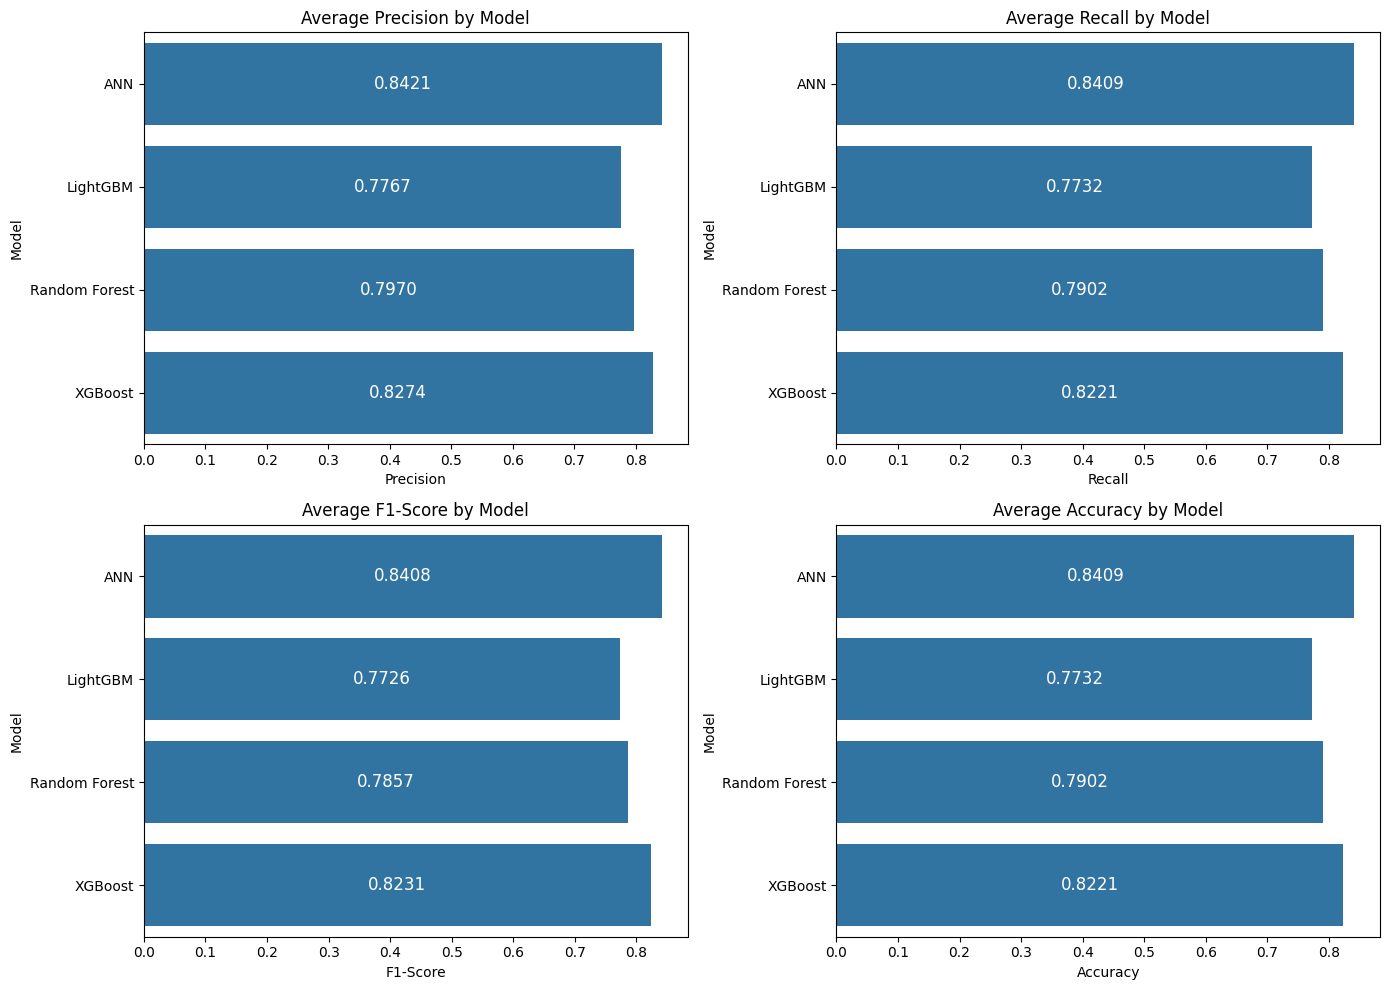

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi y√ºkleyelim
file_path = '/content/drive/MyDrive/outputs1_resample/resampled_model_performance_results1.csv'
df = pd.read_csv(file_path)

# Model isimlerine g√∂re gruplama ve ortalama deƒüerler hesaplama
average_scores = df.groupby('Model')[['Precision', 'Recall', 'F1-Score', 'Accuracy']].mean().reset_index()

# Barplot i√ßin her metrik i√ßin ayrƒ± ayrƒ± grafik
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(x=metric, y='Model', data=average_scores, ax=ax)
    ax.set_title(f'Average {metric} by Model')
    ax.set_xlabel(f'{metric}')
    ax.set_ylabel('Model')

    # Barlarƒ±n geni≈üliklerini ve pozisyonlarƒ±nƒ± alƒ±yoruz
    for j, (index, row) in enumerate(average_scores.iterrows()):
        # Barlarƒ±n ortasƒ±na yerle≈ütirmek i√ßin pozisyon hesaplama
        bar = ax.patches[j]  # ax.patches artƒ±k j ile indexleniyor
        width = bar.get_width()
        x_position = bar.get_x() + width / 2

        # Beyaz renkte deƒüerini yazƒ±yoruz
        ax.text(x_position, bar.get_y() + bar.get_height() / 2, f"{row[metric]:.4f}",
                va='center', ha='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()


            Model        Kombinasyon  Precision    Recall  F1-Score  Accuracy
11            ANN  combined_Word2Vec   0.985194  0.985466  0.985204  0.985466
8        LightGBM  combined_Word2Vec   0.952654  0.953263  0.951341  0.953263
2   Random Forest  combined_Word2Vec   0.948083  0.944429  0.933112  0.944429
5         XGBoost  combined_Word2Vec   0.985407  0.985466  0.984961  0.985466


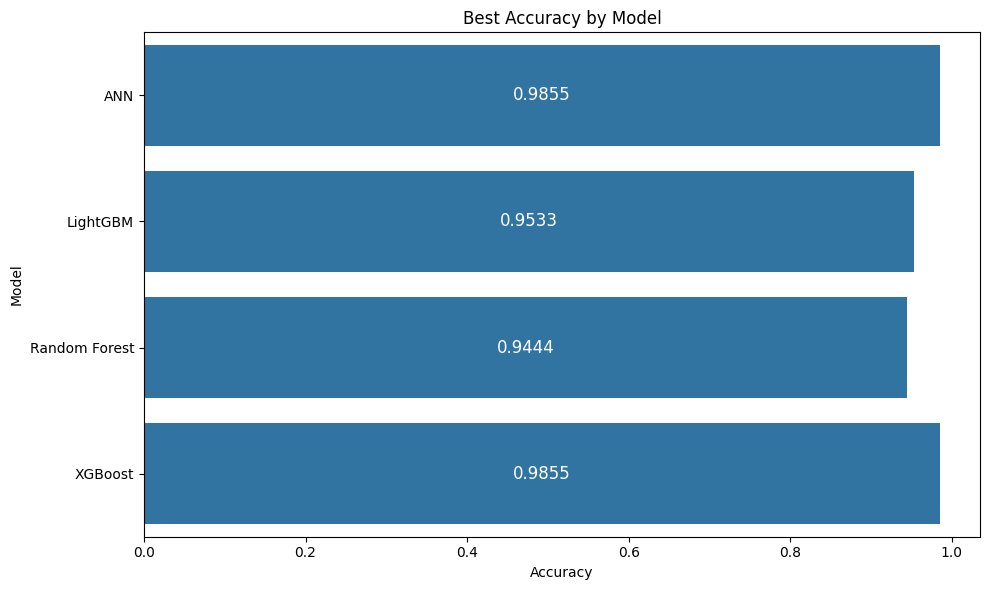

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi y√ºkleyelim
file_path = '/content/drive/MyDrive/outputs1_resample/resampled_model_performance_results1.csv'
df = pd.read_csv(file_path)

# Her model i√ßin en y√ºksek accuracy'ye sahip satƒ±rƒ± se√ßiyoruz
best_rows = df.loc[df.groupby('Model')['Accuracy'].idxmax()]

# Se√ßilen satƒ±rƒ± g√∂steriyoruz
print(best_rows[['Model', 'Kombinasyon', 'Precision', 'Recall', 'F1-Score', 'Accuracy']])

# Accuracy barplot grafiƒüini olu≈üturuyoruz
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Accuracy', y='Model', data=best_rows, ax=ax)
ax.set_title('Best Accuracy by Model')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Barlarƒ±n geni≈üliklerini ve pozisyonlarƒ±nƒ± alƒ±yoruz. enumerate kullanarak bar indexlerine eri≈üiyoruz
for i, (index, row) in enumerate(best_rows.iterrows()):
    # Barlarƒ±n ortasƒ±na yerle≈ütirmek i√ßin pozisyon hesaplama
    bar = ax.patches[i]  # ax.patches artƒ±k i ile indexleniyor
    width = bar.get_width()
    x_position = bar.get_x() + width / 2

    # Beyaz renkte Accuracy deƒüerini yazƒ±yoruz
    ax.text(x_position, bar.get_y() + bar.get_height() / 2, f"{row['Accuracy']:.4f}",
            va='center', ha='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()

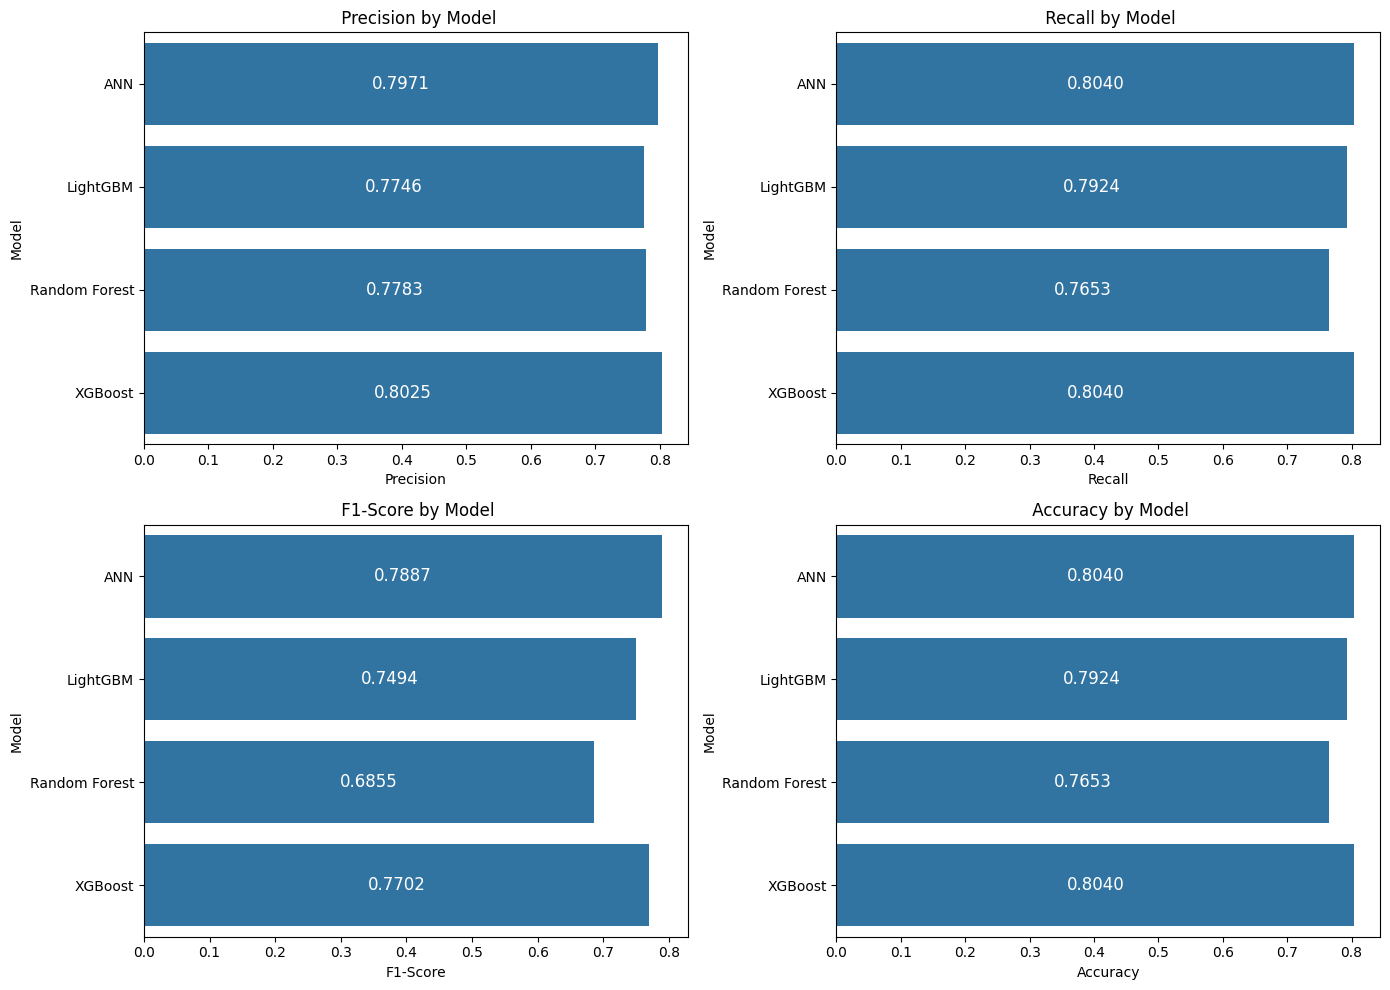

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi y√ºkleyelim
file_path = '/content/model_performance_results.csv'
df = pd.read_csv(file_path)

# Model isimlerine g√∂re gruplama ve ortalama deƒüerler hesaplama
average_scores = df.groupby('Model')[['Precision', 'Recall', 'F1-Score', 'Accuracy']].mean().reset_index()

# Barplot i√ßin her metrik i√ßin ayrƒ± ayrƒ± grafik
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(x=metric, y='Model', data=average_scores, ax=ax)
    ax.set_title(f' {metric} by Model')
    ax.set_xlabel(f'{metric}')
    ax.set_ylabel('Model')

    # Barlarƒ±n geni≈üliklerini ve pozisyonlarƒ±nƒ± alƒ±yoruz
    for j, (index, row) in enumerate(average_scores.iterrows()):
        # Barlarƒ±n ortasƒ±na yerle≈ütirmek i√ßin pozisyon hesaplama
        bar = ax.patches[j]  # ax.patches artƒ±k j ile indexleniyor
        width = bar.get_width()
        x_position = bar.get_x() + width / 2

        # Beyaz renkte deƒüerini yazƒ±yoruz
        ax.text(x_position, bar.get_y() + bar.get_height() / 2, f"{row[metric]:.4f}",
                va='center', ha='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()
